In [81]:
# primarily based on CFA Level II Volumn 3 Corporate Finance text
#project cash flow and project valuation
import numpy as np
import random
import matplotlib.pyplot as plt

In [44]:
# initial outlay for a new investment
FCInv=10 #investment in new fixed capital
NWCInv=1 #investment in net working capital
Sal0=1 #cash proceeds (salvage value) from the sale of old fixed capital
B0=2 #book value of old fixed capital
T=.2

outlay=FCInv+NWCInv-Sal0+T*(Sal0-B0)
outlay

9.8

In [45]:
# annual after-tax operating cash flow
S=10 #sales
C=1 #cash operating expenses
D=1 #depreciation charge 
T=.2
CF=(S-C-D)*(1-T)+D
CF

7.4

In [46]:
# terminal year after-tax non-operating cash flow
SalT=10 #cash proceeds (salvage value) from sale fo fixed capital on terminal date
BT=1 #book value of fixed capital on termination date

TNOCF=SalT+NWCInv-T*(SalT-BT)
TNOCF

9.2

In [47]:
t=2
r=.08
cfSeries=np.repeat(CF,t)
cfSeries=np.insert(cfSeries,0,-outlay)
cfSeries[-1]=cfSeries[-1]+TNOCF
cfSeries

array([-9.8,  7.4, 16.6])

In [58]:
def getProjNPV_repCF(outlay,CF,TNOCF,t,r):
    cfSeries=np.repeat(CF,t)
    cfSeries=np.insert(cfSeries,0,-outlay)
    cfSeries[-1]=cfSeries[-1]+TNOCF
    pNPV=np.npv(r,cfSeries ) #np.npv input cash flow series starts with t=0
    return pNPV
getProjNPV_repCF(outlay,CF,TNOCF,t,r)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  """


11.283676268861452

In [61]:
outlay=230000
CF=92000
TNOCF=70000
t=5
r=.1
getProjNPV_repCF(outlay,CF,TNOCF,t,r)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  """


162216.875399718

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  """


Mean NPV = 162356.74585430606


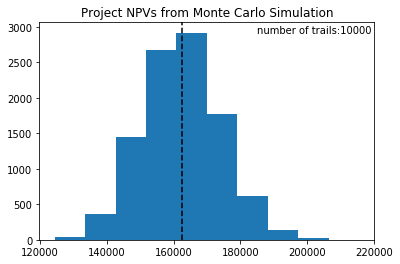

In [118]:
# monte carlo simulation
trialNum=10000
l=[]
for i in np.arange(trialNum):
    layout=random.normalvariate(230000,200) 
    CF=random.normalvariate(92000,1000)
    TNOCF=random.normalvariate(70000,500) 
    t=5
    r=random.normalvariate(.1,.01)
    l.append(getProjNPV_repCF(layout,CF,TNOCF,t,r))



print("Mean NPV =", np.mean(l))    
plt.figure()
plt.annotate('number of trails:'+str(trialNum), xy=(0.65, 0.95), xycoords='axes fraction')
plt.hist(l)
plt.title('Project NPVs from Monte Carlo Simulation')
plt.axvline(x=np.mean(l), color='black',linestyle='--')
plt.show()

In [ ]:
# scenario analysis
# base case






# worse case





# 